# Duration analyses

In [1]:
%matplotlib inline
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data
spoti_df = pd.read_csv('../output_data/spotipy_data.csv')

## Did average music duration change pre and post COVID?

In [3]:
# convert milliseconds to minutes
def mil_to_minf(milliseconds):
    minutes_float = milliseconds / 60000
    return minutes_float

# convert minutes to milliseconds
def minf_to_mil(minutes_float):
    milliseconds = minutes_float * 60000
    return milliseconds

# convert milliseconds to minute_seconds
def mil_to_minsec(milliseconds):
    seconds, milliseconds = divmod(milliseconds, 1000)
    minutes, seconds = divmod(seconds, 60)
    return minutes, seconds

# convert minutes to minute_seconds
def minf_to_minsec(minutes_float):
    milliseconds = minutes_float * 60000
    seconds, milliseconds = divmod(milliseconds, 1000)
    minutes, seconds = divmod(seconds, 60)
    return rminutes, seconds

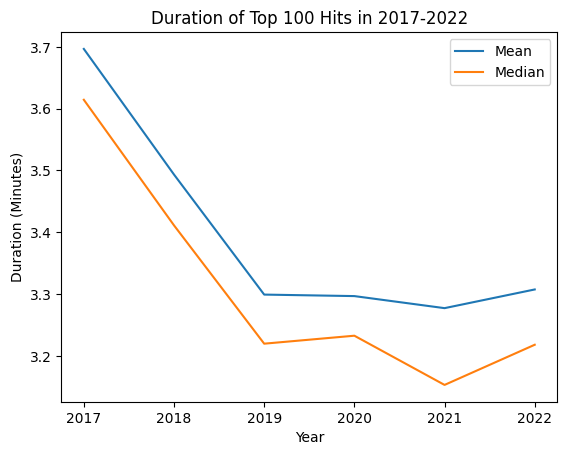

In [4]:
# Average duration vs year (line)
duration_mean_minf = []
duration_median_minf = []
years = []

for year in range (2017, 2023):
    years.append(year)
    yearly_duration_mean = spoti_df[spoti_df["Year"]==year]["duration_ms"].mean()
    yearly_duration_median = spoti_df[spoti_df["Year"]==year]["duration_ms"].median()
    yearly_duration_mean_minf = mil_to_minf(yearly_duration_mean)
    yearly_duration_median_minf = mil_to_minf(yearly_duration_median)
    duration_mean_minf.append(yearly_duration_mean_minf)
    duration_median_minf.append(yearly_duration_median_minf)

# Create line plot
plt.plot(years, duration_mean_minf, label="Mean")
plt.plot(years, duration_median_minf, label="Median")
plt.legend()
plt.title("Duration of Top 100 Hits in 2017-2022")
plt.xlabel("Year")
plt.ylabel("Duration (Minutes)")

# Save and show the line plot
plt.savefig("../output_data/duration_line.png")
plt.show()

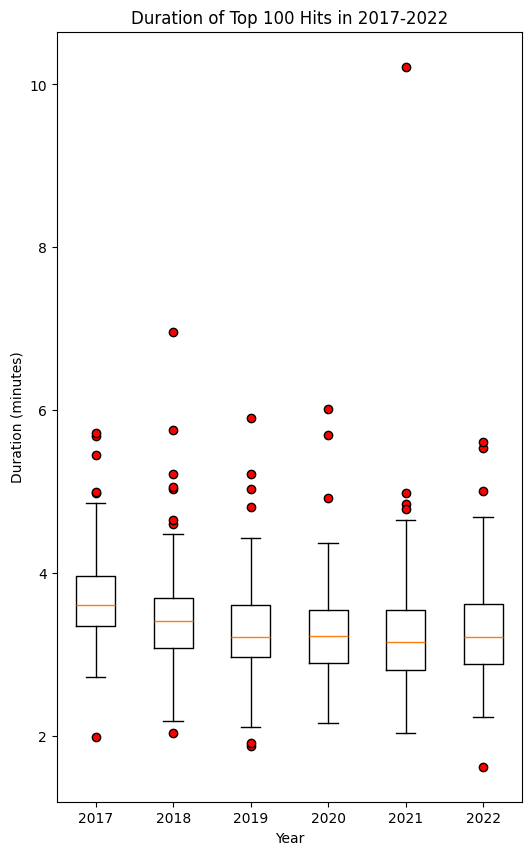

In [5]:
# Duration vs year (boxplot)
duration_minf = []
years = []
for year in range (2017, 2023):
    years.append(year)
    yearly_duration = spoti_df[spoti_df["Year"]==year]["duration_ms"]
    yearly_duration_minf = mil_to_minf(yearly_duration)
    duration_minf.append(yearly_duration_minf)

# Create Boxplot
fig1, ax1 = plt.subplots(figsize=(6,10))
ax1.boxplot(duration_minf, labels = years, flierprops = dict(markersize = 6, markerfacecolor = "red"))
ax1.set_title("Duration of Top 100 Hits in 2017-2022")
ax1.set_xlabel("Year")
ax1.set_ylabel("Duration (minutes)")

# Save and show the boxplot
plt.savefig("../output_data/duration_box.png")
plt.show()

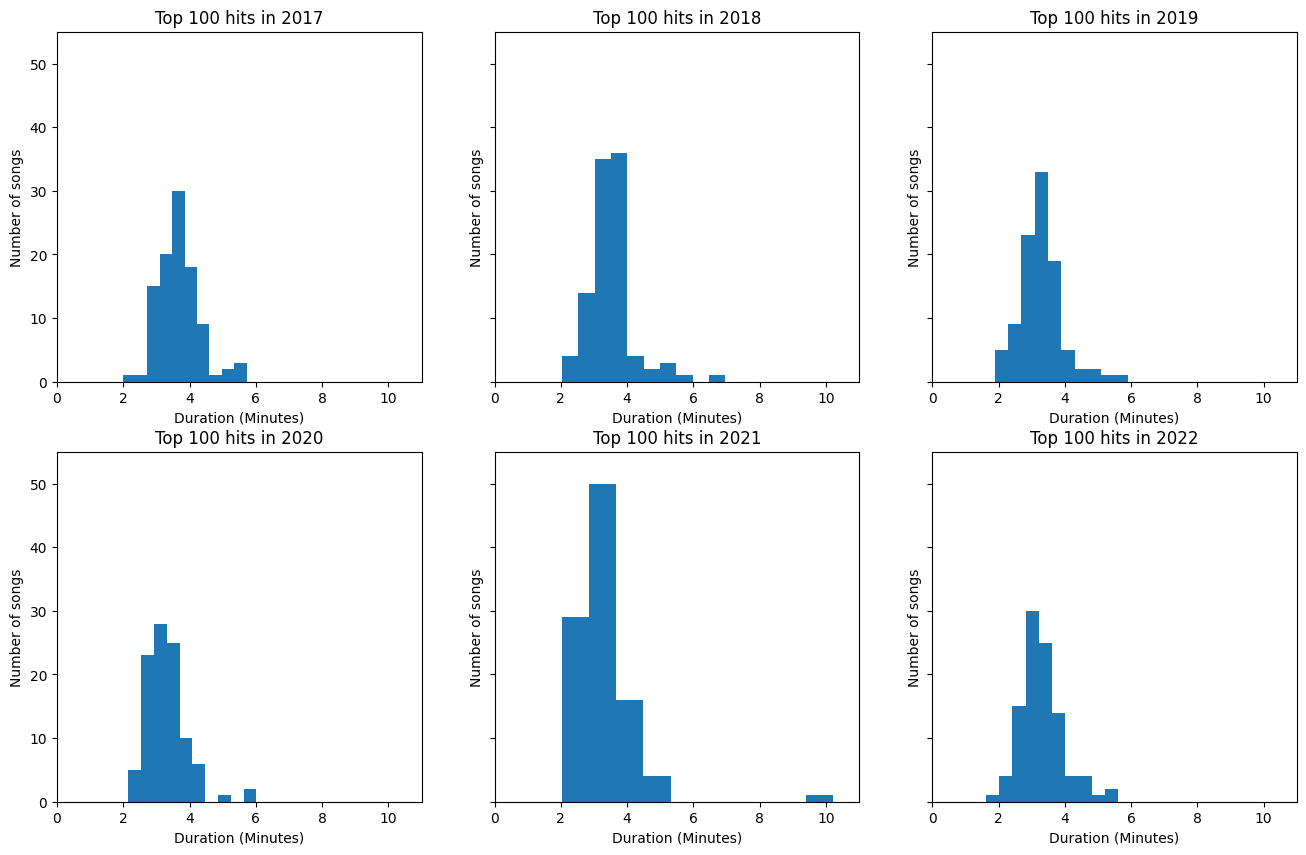

In [6]:
# Duration per year (histogram)
fig, axs = plt.subplots(2, 3, sharey = True, figsize=(16, 10))
custom_xlim = (0, 11)
custom_ylim = (0, 55)
plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim, xlabel="Duration (Minutes)", ylabel="Number of songs")
axs[0, 0].hist(duration_minf[0])
axs[0, 0].set_title("Top 100 hits in 2017")
axs[0, 1].hist(duration_minf[1])
axs[0, 1].set_title("Top 100 hits in 2018")
axs[0, 2].hist(duration_minf[2])
axs[0, 2].set_title("Top 100 hits in 2019")
axs[1, 0].hist(duration_minf[3])
axs[1, 0].set_title("Top 100 hits in 2020")
axs[1, 1].hist(duration_minf[4])
axs[1, 1].set_title("Top 100 hits in 2021")
axs[1, 2].hist(duration_minf[5])
axs[1, 2].set_title("Top 100 hits in 2022")

# Save and show the histogram
plt.savefig("../output_data/duration_histogram.png")
plt.show()

### It is a generally true that duration of top 100 hit songs become shorter during the period of 2017-2022. While this trend continued during the period of COVID (2020-2022), there is little evidence to show that COVID is a major factor that contributes to this trend.